<a href="https://colab.research.google.com/github/kashish-goel/Animal-classification/blob/master/Animal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Recognize an Animal In an Image** 

**Training Deep Learning Model**


In [ ]:
import tensorflow as tf            # deep learning library           
import numpy as np                      # for matrix operations      
import matplotlib.pyplot as plt          # for visualization     
%matplotlib inline

In [ ]:
import pandas as pd
test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cifar_image_flattened_pixels.csv")

In [ ]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()            # Loading data

In [ ]:
print("There are ", len(x_train), "images in the training dataset")     # checking total number of records / data points available in the X_train dataset
print("There are ", len(x_test), "images in the test dataset")            # checking total number of records / data points available in the X_test dataset

There are  50000 images in the training dataset
There are  10000 images in the test dataset


In [ ]:
x_train[0].shape        # Checking the shape of one image

(32, 32, 3)

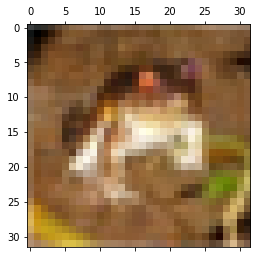

In [ ]:
plt.matshow(x_train[0])

In [ ]:
y_train[0]        # Take a look how one image looks like

array([6], dtype=uint8)

In [ ]:
#representing the RGB (Red Green Blue) value
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train_flattened = x_train.reshape(len(x_train), 32*32*3)        # converting our 2D array representin an image to one dimensional
x_test_flattened = x_test.reshape(len(x_test), 32*32*3)

In [ ]:
x_train_flattened.shape

(50000, 3072)

In [ ]:
## Defining the Model
model = tf.keras.Sequential([tf.keras.layers.Dense(36, input_shape=(3072,), activation='relu')])
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))


In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 36)                110628    
_________________________________________________________________
dense_22 (Dense)             (None, 16)                592       
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 136       
Total params: 111,356
Trainable params: 111,356
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from datetime import datetime

In [ ]:
logdir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

In [ ]:
# Fit the model
training_history = model.fit(
    x_train_flattened, 
    y_train, 
    batch_size=230,
    verbose=1, 
    epochs=5,
    validation_data=(x_test_flattened, y_test),
    callbacks=[tensorboard_callback],
)

Epoch 1/5
218/218 [==============================] - 2s 9ms/step - loss: -38.0226 - accuracy: 0.1000 - val_loss: -38.0239 - val_accuracy: 0.1000
Epoch 2/5
218/218 [==============================] - 2s 8ms/step - loss: -38.0227 - accuracy: 0.1000 - val_loss: -38.0243 - val_accuracy: 0.1000
Epoch 3/5
218/218 [==============================] - 2s 8ms/step - loss: -38.0235 - accuracy: 0.1000 - val_loss: -38.0243 - val_accuracy: 0.1000
Epoch 4/5
218/218 [==============================] - 2s 8ms/step - loss: -38.0238 - accuracy: 0.1000 - val_loss: -38.0243 - val_accuracy: 0.1000
Epoch 5/5
218/218 [==============================] - 2s 8ms/step - loss: -38.0238 - accuracy: 0.1000 - val_loss: -38.0243 - val_accuracy: 0.1000


In [ ]:
# Evaluate the model
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: -38.0243 - accuracy: 0.1000


[-38.02425003051758, 0.10000000149011612]

In [ ]:
#getting final predictions
target=model.predict(test_data)
target[0]

array([4343.961 , 2336.9246, 2716.2405, 3548.464 ,    0.    , 1899.0862,
       6367.8584, 1789.9099], dtype=float32)

In [ ]:
# saving the model
res = pd.DataFrame(target)
res.index = test_data.index 


from google.colab import files
res.to_csv('target_results.csv')         
files.download('target_results.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>